Monte Carlo Simulation for Evacuation  
Zhesong Wu

Libraries: 
1. OSMnx: Open Street Map package, see: https://github.com/gboeing/osmnx 
2. Networkx: more information see: https://networkx.github.io/ 
3. ffmpeg: need for animation, more infomration see: https://www.ffmpeg.org/
4. Pandas and Numpy 

Files: 
Classes, methods and default values in 'Model.py'


In [1]:

import os

# run the commented line with your own GDAL DATA path if you meet projection library lack problem
# you can search the locaiton of the file under the GDAL librarby
os.environ['GDAL_DATA'] = r'C:\Users\JAPO\Anaconda3\pkgs\libgdal-2.4.3-hc7758a1_8\Library\share\gdal'

import osmnx as ox
import pandas as pd
import networkx as nx
filename = r'Models.py'
exec(compile(open(filename, "rb").read(), filename, 'exec'))

Study Area: 
1000 meters near Student Union 

Notice, you can define your own study area by changing the central address and graph distance. Also, many other methods are provided in osmnx like graph from coordinates. The clean function is defined from Model.py to fill geometry data for each road if it is lacking. 

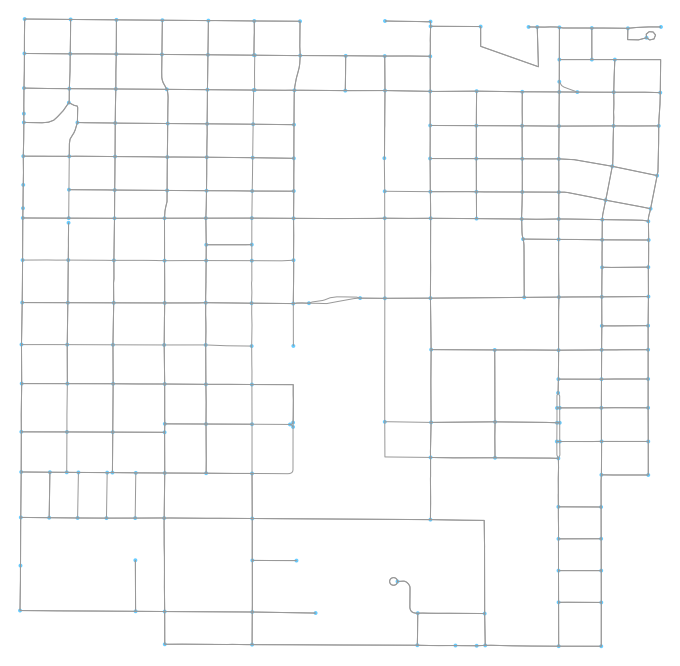

(<Figure size 860.103x864 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1f2d99e7a58>)

In [2]:
graph_distance = 1000
central_address = '1401 W Green St, Urbana, IL 61801'
g = ox.graph_from_address(central_address, distance=graph_distance, distance_type='bbox', network_type='drive')
g= clean(ox.project_graph(g))
ox.plot_graph(g, fig_height = 12)

Single Model:

Model input: graph, number of people, number of refuges, and the evacuation strategy.  
 
Additionally, you can change the refuge max capacity, road max capacity, and the threshold of death rate in the python file to test your own model.
 
 
See more details in Model.py

In [59]:
model = Model(g,1000,2,1)

find_refuge() is to find the routes for every individual.  
  
run() is to run the model.  
There are two ways to run the model: Fixed steps, and complete run. 
1. Fixed steps: type in the paramters like run(nsteps=n), where n is the number of the timesteps you want to run, you can use this methods to analyze the behavior of people in any specific time stage. 
2. Complete run: type in the parameters like run(save_args=(fig, ax, filename)). By using the complete run you can run your model to the end. The final stage of individuals would be output as a csv file. Additionally, a short movie would be created to visualize the whole evacuation.

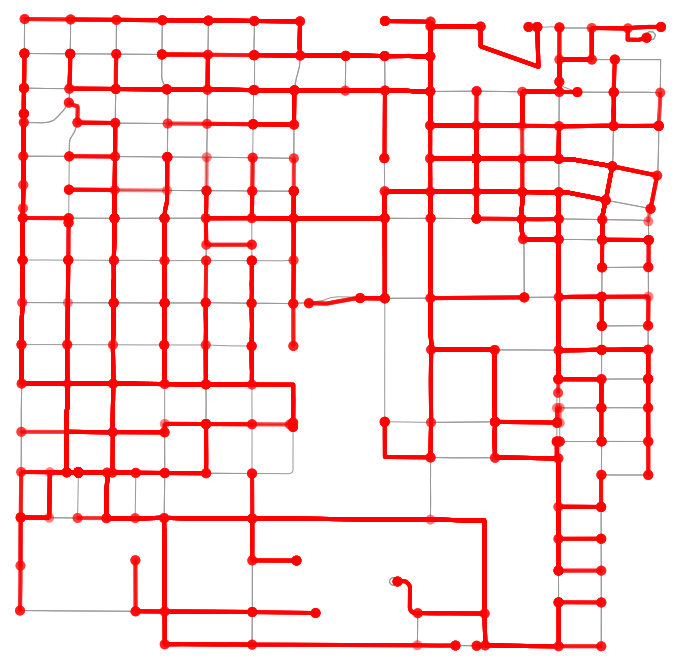

In [60]:
model.find_refuge(show_map=1)

Methods1: Fixed Steps

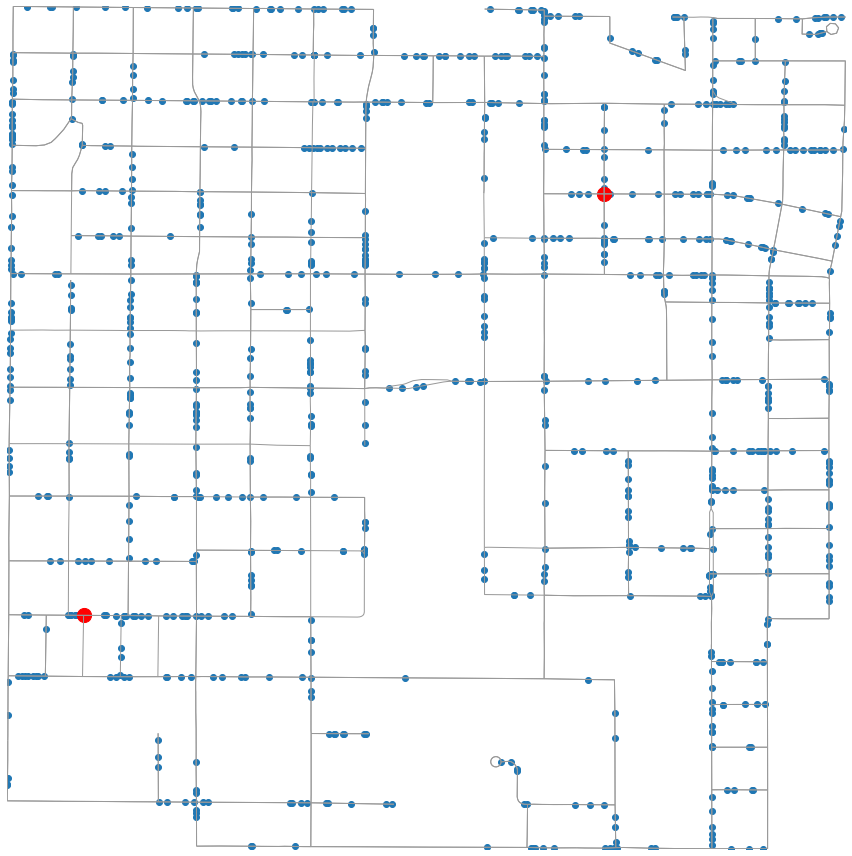

In [61]:
# Location of people when generated
fig, ax = ox.plot_graph(g, node_size=0, fig_height=12, show=False, margin=0)
fig.tight_layout()
model.show(ax)
model.show_refuge(ax)
fig

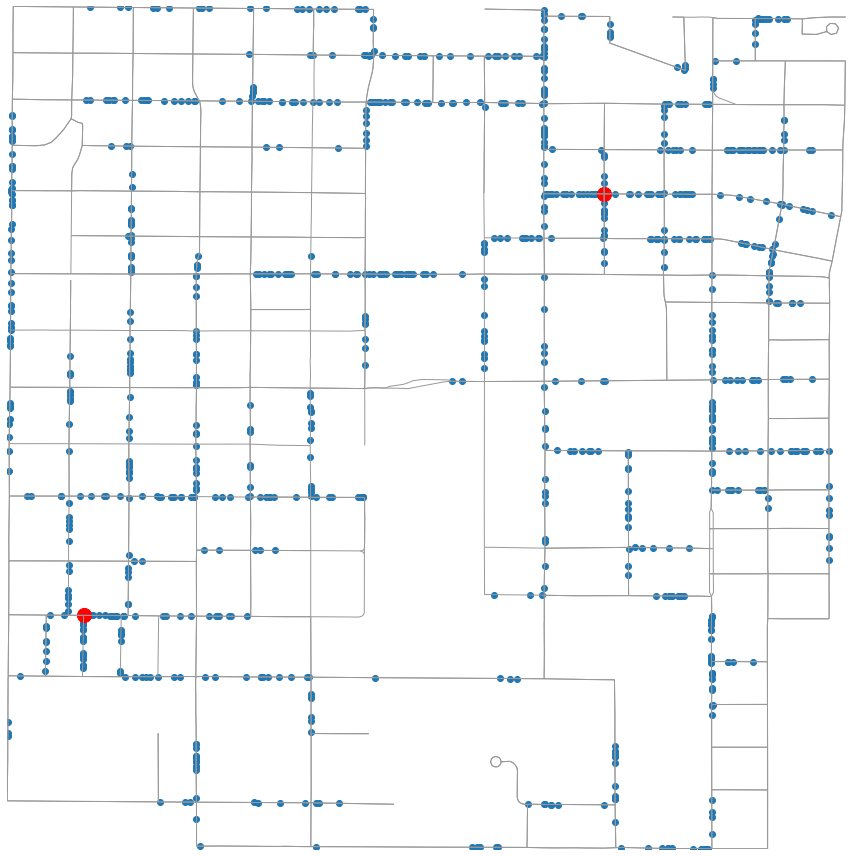

In [62]:
# Location of people after 30 timestep
fig, ax = ox.plot_graph(g, node_size=0, fig_height=12, show=False, margin=0)
fig.tight_layout()
model.run(nsteps=30)
model.show(ax)
model.show_refuge(ax)
fig

Methods 2: Complete Run 
 
Notice: I did not define any reverse or undo function, now all the process of the model is INREVERSIBLE

In [63]:
model2 = Model(g,1000,2,1)
fig, ax = ox.plot_graph(g, node_size=0, fig_height=15, show=False, margin=0)
fig.tight_layout()
model2.run(save_args=(fig,ax,'result'))

Evacuation completed at time: 814


In [72]:
model3 = Model(g,10,2,0)
fig, ax = ox.plot_graph(g, node_size=0, fig_height=15, show=False, margin=0)
fig.tight_layout()
model3.run(save_args=(fig,ax,'result'))

Evacuation completed at time: 239


Simple Analysis for the Evacuation Model 

Hypothesis: a flexible-plan evacuation should have a higher performance than fixed-plan evacuation

In [3]:
for i in range(2):
    model = Model(g,1000,2,1)
    model2 = model.copy()
    model2.strategy = 0
    filename = 'withStrategy_result_' + str(i)
    filename2 = 'withoutStrategy_result_' + str(i)
    os.chdir(r'C:\Users\JAPO\Desktop\UIUC\IS590\final_projects\analysis')
    
    fig, ax = ox.plot_graph(g, node_size=0, fig_height=12, show=False, margin=0)
    fig.tight_layout()
    model.run(save_args=(fig,ax,filename))
    fig, ax = ox.plot_graph(g, node_size=0, fig_height=12, show=False, margin=0)
    fig.tight_layout()
    model2.run(save_args=(fig,ax,filename2))


Evacuation completed at time: 850
Evacuation completed at time: 1324


In [7]:
costs_s = []
safe_rate_s = []
costs_w = []
safe_rate_w = []
for file in os.listdir(r'C:\Users\JAPO\Desktop\UIUC\IS590\final_projects'):
    if file.endswith('.csv') and 'without' not in file:
        print(file)
        df = pd.read_csv(file)
        costs_s.append(df['time'].max())
        g = df.groupby('status').agg({'time':'count'})
        #safe_rate_s.append(g.loc['Arrived','time']/(g.loc['Arrived','time'] + g.loc['Dead By Crowd','time']))
    if file.endswith('.csv') and 'without' in file:
        df = pd.read_csv(file)
        costs_s = df['time'].max()
        g = df.groupby('status').agg({'time':'count'})
        #safe_rate_s.append(g.loc['Arrived','time']/(g.loc['Arrived','time'] + g.loc['Dead By Crowd','time']))
                     

result.csv
withStrategy_result_0.csv
withStrategy_result_1.csv
withStrategy_result_2.csv
withStrategy_result_3.csv
withStrategy_result_4.csv


In [68]:
a = [(1,2),(3,4)]
for p in a:
    p = (6,6)
a


[(1, 2), (3, 4)]